##### Copyright 2019 The TensorFlow Authors.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2: inicio rápido para principiantes

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">Ver en TensorFlow.org</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/es-419/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Ejecutar en Google Colab</a></td>
  <td>     <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/es-419/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">Ver fuente en GitHub</a> </td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/es-419/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">Descargar notebook</a>   </td>
</table>

En esta breve introducción se usa [Keras](https://www.tensorflow.org/guide/keras/overview) para:

1. Cargar un conjunto de datos predeterminado.
2. Crear un modelo de aprendizaje automático de red neural que clasifique las imágenes.
3. Entrenar la red neural.
4. Evaluar la exactitud del modelo.

Este tutorial es un notebook de [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb). Los programas de Python se ejecutan directamente en tu navegador —una gran manera de aprender y utilizar TensorFlow. Para poder seguir este tutorial, presione el botón que se encuentra en la parte superior de esta página y ejecute este notebook en Google Colab.

1. En Colab, conéctese al tiempo de ejecución de Python: en la parte superior derecha de la barra de menús, seleccione *CONNECT*.
2. Para ejecutar todo el código en el notebook, seleccione **Runtime** &gt; **Run all**. Para ejecutar las celdas de a una, coloque el mouse sobre cada celda y seleccione el ícono para **ejecutar la celda**.

![Ícono de Ejecutar celda](https://github.com/tensorflow/docs-l10n/blob/master/site/es-419/tutorials/quickstart/images/beginner/run_cell_icon.png?raw=1)

## Preparación de TensorFlow

Para empezar, importe TensorFlow a su programa:

In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


Si está siguiendo los pasos en su propio entorno de desarrollo y no en [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), consulte esta [guía de instalación](https://www.tensorflow.org/install) para configurar TensorFlow para el desarrollo.

Nota: controle haber actualizado a la última versión de `pip` para instalar el paquete de TensorFlow 2 en caso de que use su propio entorno de desarrollo. Para más detalles, consulte la [guía de instalación](https://www.tensorflow.org/install).

## Carga de un conjunto de datos

Cargue y prepare [conjunto de datos MNIST](http://yann.lecun.com/exdb/mnist/). Los valores de los pixeles de las imágenes van de 0 a 255. Escale esos valores a un rango de 0 a 1 dividiendo los valores por `255.0`. De este modo, también se convierten los datos de muestra de los enteros a números de punto flotante:

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# * Aquí estamos normalizando el vector de imagenes. 
x_train, x_test = x_train / 255.0, x_test / 255.0

## Creación de un modelo de aprendizaje automático

Cree un modelo `tf.keras.Sequential`:

In [5]:
 # ? -  Generamos un modelo secuencial. Un stack lineal
model = tf.keras.models.Sequential([
  # ? - Con la función .Flatten, aplanamos la imagen 2D a un vector 1D de 784 elementos -> Ya que es sequential. Un tensor de entrada y uno de salida. 
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # ? - Esta capa esta completamente interconectada con 128 neuronas, aplicando la función RELU -> Relación no lineal. 
  tf.keras.layers.Dense(128, activation='relu'),
  # ? - Esta capa añade suelta un 20% de las conexiones de la capa anterior para prevenir overfitting. 
  tf.keras.layers.Dropout(0.2),
  # ? - La salida es una capa densa con las 10 salidas que deseamos. Vamos definiendo capa a capa. 
  tf.keras.layers.Dense(10)
])

### Modelo Secuencial de Keras: 
* Un sistema lineal de capas, donde cada capa tiene un tensor de entrada y una de salida. 
* Cuando usamos un modelo secuencial decimos que tiene una arquitectura simple donde la salida de una capa va directamente a la siguiente capa sin ningunas ramas externas en la arquitectura. 
 
![Modelo Secuencial de Keras](image.png)

* **Entrada de unico tensor:** Implica que los datos de entrada para cada instancia debe de ser una estructura **unificada**. Por ejemplo, para MNIST, cada imagen es una matriz de 28 x 28 -> un vector de 784. Pero es un único vector. Un único elemento. 

* **Salida de único tensor:** Implica que el modelo produce un único tensor como sálida, indicando que la salida es un único elemento. Como lo que explicamos en la parte de arriba. 
  
*Esto lo que no nos permite es generar módelos con varias entradas y salidas - Es uni-modal. Util para clasificación binaria, de imagen, y regresión.*

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) es útil para apilar capas donde cada una tiene un [tensor](https://www.tensorflow.org/guide/tensor) de entrada y uno de salida. Las capas son funciones con una estructura matemática desconocida que se puede reutilizar y que tiene variables entrenables. La mayoría de los modelos TensorFlow están compuestos por capas. Este modelo usa las capas [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) y [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).

Para cada ejemplo, el modelo devuelve un vector de [logits](https://developers.google.com/machine-learning/glossary#logits) o puntajes de [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) (registro de probabilidades) por cada clase.

#### Logits
Los outputs de la última capa de la red neuronal, previo a haber aplicado la función de activación como la ReLu o en este caso, la SoftMax. Es la puntuación desnormlizada. 

In [6]:
 # ? - Predicción de la primera imagen del dataset
predictions = model(x_train[:1]).numpy()
predictions # ? - Como la última capa de nuestro dataset no tiene una función de activación, obtenemos log-its.

array([[ 0.62282723, -0.26199913,  0.14357197, -0.20904775, -0.5858375 ,
        -0.15174448, -0.11072864, -0.6244441 ,  0.5548219 ,  0.1891006 ]],
      dtype=float32)

La función `tf.nn.softmax` convierte estas funciones logits en *probabilidades* para cada clase:

In [8]:
tf.nn.softmax(predictions).numpy()

array([[0.17932104, 0.07402119, 0.11104355, 0.07804634, 0.0535445 ,
        0.08264927, 0.08610968, 0.05151672, 0.16753165, 0.11621606]],
      dtype=float32)

#### Estabilidad Numérica: 
* La función softmax convierte los logits en probabilidades aplicando la exponencial a cada logit y luego dividiendo por la suma de todas las exponencial de los logits. Este proceso puede llevar a valores super elevados debido a la exponencial, pero puede causar desbordamiento. 
* Es por ello que antes observamos los valores numericos de aplicarlo, y después verficamos. (Lo mismo pasa en caso de que los pesos sean positivos. )

Nota: es posible aplicar la función `tf.nn.softmax` en la función de activación para la última capa de la red. Si bien esto puede hacer que la salida del modelo se interprete más directamente, **este enfoque no se recomienda ya que es imposible proporcionar un cálculo de pérdida numéricamente estable y exacto para todos los modelos con salida softmax.**

Defina la función de pérdida (tambien conocido como la función de coste) para el entrenamiento con `losses.SparseCategoricalCrossentropy`:

Por contexto:
- La diferencia cuadrada de la salida con respecto a los objetivos al cuadrado. 

In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# ? - Sparse Categorical Crossentropy: 
# * - Specific type of loss function used for classification, where the labels are
# * - And the prediction are to be made across multiple classes. 
# ? - From logits = True indicates whether the predictions have been passed to it are logits or probabilities. 

La función de pérdida toma un vector de valores verdaderos de base y un vector de logits y devuelve una pérdida escalar para cada ejemplo. Esta pérdida es igual a la probabilidad de registro negativa de la clase verdadera: La pérdida es cero si el modelo está seguro de la clase correcta.

El modelo sin entrenar arroja probabilidades cercanas al lo aleatorio (1/10 para cada clase), entonces, la pérdida inicial debería estar cerca de `-tf.math.log(1/10) ~= 2.3`.

> En un problema de clasificación con 10 clases posibles. Un modelo no entrenado tiene una probabilidad de 1/10 de acertar la clase de manera aleatoria. La entropía cruzada, lo que mide la función de SparseCategoricalCrossentropy, calcula la pérdida basándose en la probabilidad aleatoria. La fórmula para la entropía cruzada en el caso de una clasificación correcta es -log(p)- Si todas las clases tienen la misma probabilidad (como sería el caso para un modelo no entrenado que adivina al azar), entonces p es 1/10, y la pérdida sería -log(1/10). 

La función logaritmo natural de 1/10 es aproximadamente igual a 2.3 

In [24]:
loss_fn(y_train[:1], predictions).numpy()

2.4931493

Antes de empezar el entrenamiento, configure y compile el modelo con Keras `Model.compile`. Configure la clase del [`optimizador`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) como `adam`, establezca `loss` para la función `loss_fn` que definió antes y especifique una métrica a evaluar para el modelo, mediante la determinación del parámetro `metrics` para `accuracy`.

In [25]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Entrenamiento y evaluación del modelo

Use el método `Model.fit` para ajustar los parámetros del modelo y minimizar la pérdida:

In [26]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 911us/step - loss: 0.0423 - accuracy: 0.9857
Epoch 2/5
1875/1875 [==============================] - 2s 826us/step - loss: 0.0412 - accuracy: 0.9860
Epoch 3/5
1875/1875 [==============================] - 2s 833us/step - loss: 0.0373 - accuracy: 0.9871
Epoch 4/5
1875/1875 [==============================] - 2s 830us/step - loss: 0.0350 - accuracy: 0.9877
Epoch 5/5
1875/1875 [==============================] - 2s 831us/step - loss: 0.0321 - accuracy: 0.9889


El método `Model.evaluate` controla el desempeño del modelo, por lo general con un [conjunto de evaluación](https://developers.google.com/machine-learning/glossary#validation-set) o un [conjunto de prueba](https://developers.google.com/machine-learning/glossary#test-set).

In [27]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0762 - accuracy: 0.9809 - 215ms/epoch - 687us/step


[0.07620656490325928, 0.98089998960495]

El clasificador de imágenes ahora está entrenado para proporcionar ~98% de exactitud en este conjunto de datos. Para más información, lea los [tutoriales de TensorFlow](https://www.tensorflow.org/tutorials/).

Si desea que su modelo devuelva una probabilidad, puede empaquetar el modelo entrenado y adjuntarle el softmax:

In [22]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [31]:
probabilities = probability_model(x_test[:5])

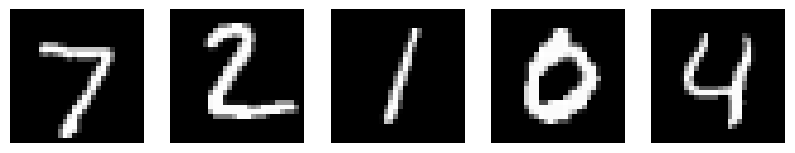

Recognised numbers from the dataset: [7 2 1 0 4]


In [34]:
import matplotlib.pyplot as plt 
import numpy as np 

predicted_classes = np.argmax(probabilities, axis = 1)

fig, axes = plt.subplots(1,5, figsize = (10,2))
for i, ax in enumerate(axes): 
    ax.imshow(x_test[i], cmap = 'gray')
    ax.axis('off')
plt.show()
print(f"Recognised numbers from the dataset: {predicted_classes}")

## Conclusión

¡Felicitaciones! Ha entrenado un modelo de entrenamiento automático con un conjunto de datos predeterminado usando la API [Keras](https://www.tensorflow.org/guide/keras/overview).

Para acceder a más ejemplos sobre el uso de Keras, consulte los [tutoriales](https://www.tensorflow.org/tutorials/keras/). Para más información sobre cómo crear modelos con Keras, lea las [guías](https://www.tensorflow.org/guide/keras). Si quiere aprender más sobre cómo cargar y preparar los datos, mire los tutoriales sobre [carga de datos de imágenes](https://www.tensorflow.org/tutorials/load_data/images) o [carga de datos CSV](https://www.tensorflow.org/tutorials/load_data/csv).
